In [1]:
# Import necessary libraries once
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv("electronics_sales_data.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Basic Overview
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())

# Unique Counts
print("\nUnique Products:", df['Product'].nunique())
print("Unique Categories:", df['Category'].nunique())
print("Unique Customers:", df['Customer'].nunique())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

Shape: (1000, 8)

Data Types:
 Order ID             int64
Date        datetime64[ns]
Customer            object
Product             object
Category            object
Quantity             int64
Price                int64
Total                int64
dtype: object

Summary Statistics:
           Order ID     Quantity         Price         Total
count  1000.000000  1000.000000   1000.000000   1000.000000
mean    500.500000     3.058000   4283.700000  12626.400000
std     288.819436     1.426419   5313.410076  18216.592224
min       1.000000     1.000000    100.000000    100.000000
25%     250.750000     2.000000    200.000000    600.000000
50%     500.500000     3.000000    350.000000   1750.000000
75%     750.250000     4.000000   8000.000000  16000.000000
max    1000.000000     5.000000  15000.000000  75000.000000

Unique Products: 10
Unique Categories: 3
Unique Customers: 357

Missing Values:
 Order ID    0
Date        0
Customer    0
Product     0
Category    0
Quantity    0
Price      

In [3]:
# Show the first 5 rows of the data
df.head()

,Order ID,Date,Customer,Product,Category,Quantity,Price,Total
0,1,2025-02-02,Michael,Webcam,Accessories,5,350,1750
1,2,2025-03-17,Phillip,Webcam,Accessories,5,350,1750
2,3,2025-03-24,Joshua,Laptop,Computers,2,15000,30000
3,4,2024-11-20,Brandon,Headphones,Accessories,3,200,600
4,5,2025-02-19,Lisa,Webcam,Accessories,5,350,1750


In [8]:
# Top 10 most sold products
top_products = df['Product'].value_counts().head(10)
top_products

Charger       110
Webcam        108
Keyboard      108
Laptop        107
Monitor       107
Smartphone     98
Mouse          96
Tablet         96
Headphones     93
Printer        77
Name: Product, dtype: int64

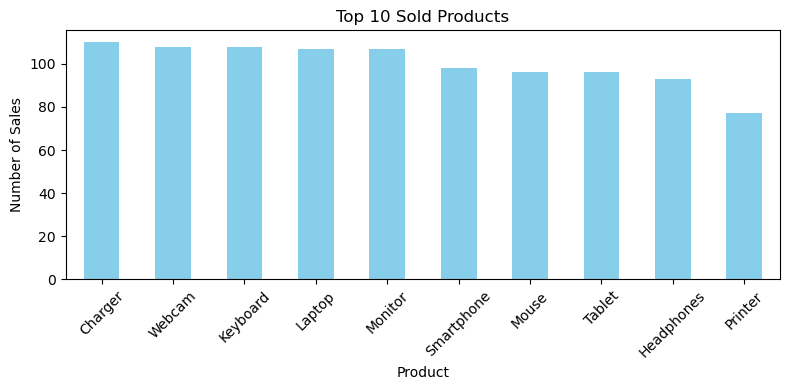

In [9]:
# Top 10 Sold Products
top_products = df['Product'].value_counts().head(10)
plt.figure(figsize=(8,4))
top_products.plot(kind='bar', title='Top 10 Sold Products', color='skyblue')
plt.xlabel('Product')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Total Revenue
total_revenue = df['Total'].sum()
print("\nTotal Revenue: $", total_revenue)


Total Revenue: $ 12626400


In [11]:
# Group data by 'Category' and sum total revenue for each category
category_revenue = df.groupby('Category')['Total'].sum().sort_values(ascending=False)
print(category_revenue)

Category
Computers      6393000
Mobiles        5876000
Accessories     357400
Name: Total, dtype: int64


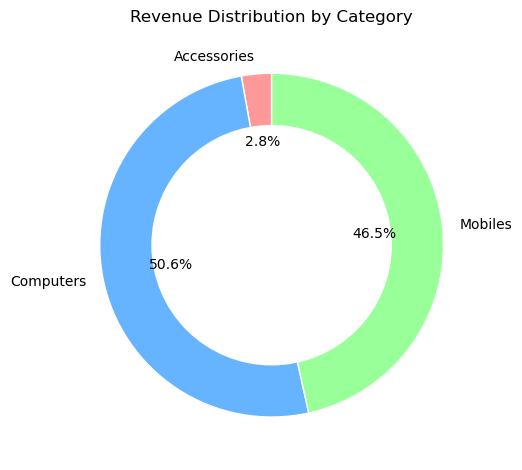

In [12]:
# Revenue Distribution by Category (Donut Chart Only)
category_revenue = df.groupby('Category')['Total'].sum()
colors = ['#ff9999','#66b3ff','#99ff99']
plt.pie(category_revenue, labels=category_revenue.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Revenue Distribution by Category')
plt.tight_layout()
plt.show()

In [14]:
# Extract month and year from 'Date' column to analyze monthly sales
df['Month'] = df['Date'].dt.to_period('M')

# Group data by 'Month' and sum the total sales for each month, then sort descending
monthly_sales = df.groupby('Month')['Total'].sum().sort_values(ascending=False)
print(monthly_sales)

Month
2024-12    2634900
2025-01    2354550
2025-04    1863750
2025-03    1775900
2025-02    1703950
2025-05    1284650
2024-11    1008700
Freq: M, Name: Total, dtype: int64


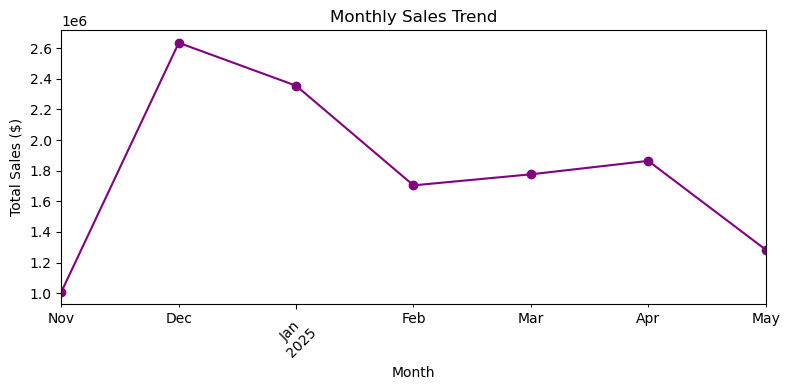

In [15]:
# Monthly Sales Trend
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total'].sum().sort_index()
plt.figure(figsize=(8,4))
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend', color='purple')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Find top 10 customers by total revenue they contributed
top_customers = df.groupby('Customer')['Total'].sum().sort_values(ascending=False).head(10)
print(top_customers)

Customer
Michael    250650
Mary       244050
Richard    240300
Jeffrey    227700
David      211300
Scott      201400
Joseph     182950
Angela     182250
Robert     178950
Mark       178450
Name: Total, dtype: int64


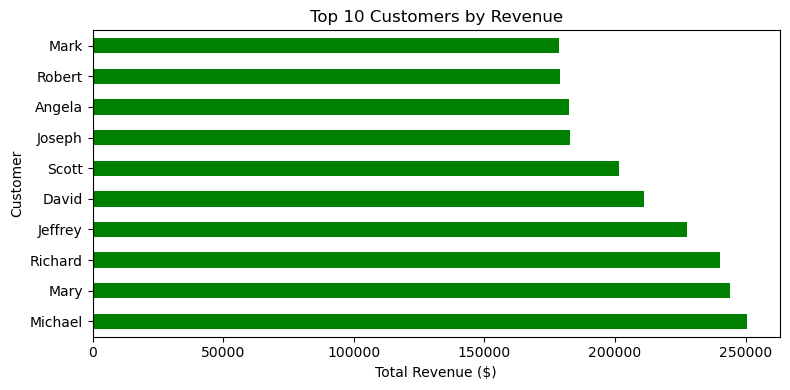

In [17]:
# Top 10 Customers by Revenue
top_customers = df.groupby('Customer')['Total'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
top_customers.plot(kind='barh', color='green', title='Top 10 Customers by Revenue')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Customer')
plt.tight_layout()
plt.show()

In [18]:
# Average Order Value
average_order_value = df['Total'].mean()
print("\nAverage Order Value: $", round(average_order_value, 2))


Average Order Value: $ 12626.4


In [19]:
# Total quantity sold per product
product_quantity = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
print(product_quantity)

Product
Keyboard      345
Monitor       332
Webcam        331
Charger       327
Headphones    301
Mouse         301
Tablet        301
Laptop        299
Smartphone    289
Printer       232
Name: Quantity, dtype: int64


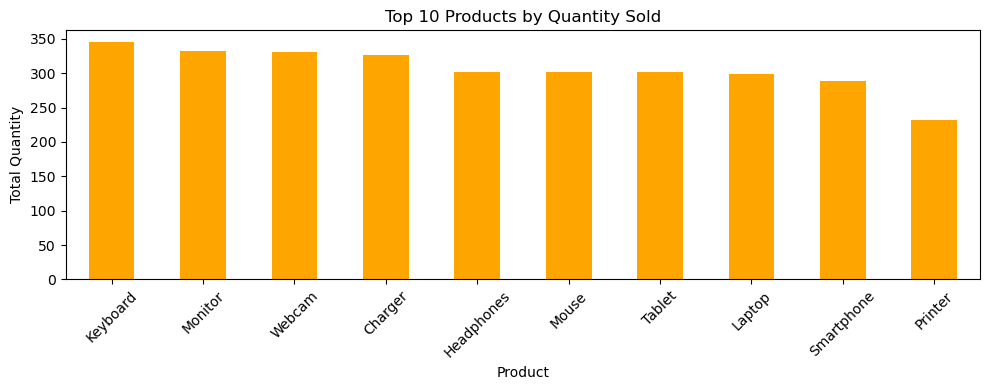

In [20]:
# Total Quantity Sold per Product
product_quantity = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,4))
product_quantity.head(10).plot(kind='bar', color='orange', title='Top 10 Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()